Demonstração das Máquinas de Vetores Suporte

- Vamos simular um cenário de classificação não linear, no qual a versão base do SVM não performa bem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'

Text(0, 0.5, 'X2')

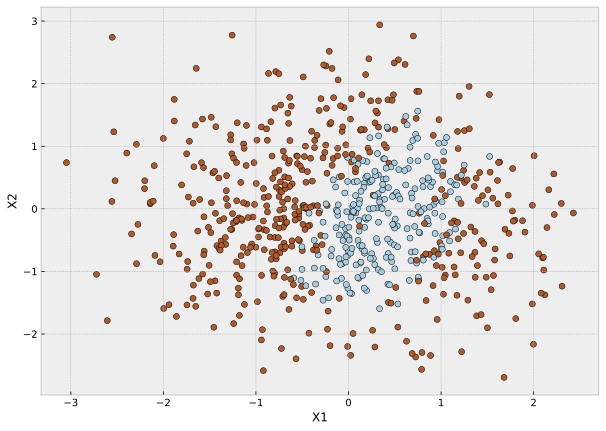

In [6]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]

def make_data():
    N = 1400
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y

X, Y = make_data()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=0, test_size=0.5)

plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=Ytrain, edgecolors='k')

plt.xlabel("X1")
plt.ylabel("X2")

In [8]:
## Plotar a fronteira de decisão

def plot_boundary(clf, X, Y):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');

In [14]:
## Vamos visualizar como a fronteira de decisão se comporta no modelo Logístico
## O qual é um dos classificadores que presume uma separação linear entre classes

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain, Ytrain)

LogisticRegression()

0.5371428571428571

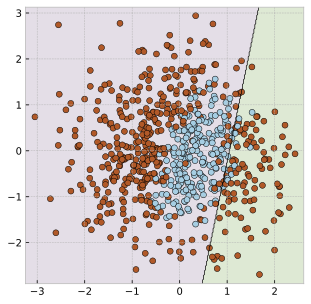

In [15]:
plot_boundary(logreg, Xtrain, Ytrain)
accuracy_score(Ytest, logreg.predict(Xtest))

One of the simplest nonlinear kernels is called a polynomial kernel. This is just a polynomial function of the normal dot product.

Um Kernel não-linear simples é o kernel polinomial. Este é apenas uma função polinomial do produto de dois vetores.

$$
K(x_1,x_2) = (x_1*x_2+1)^2
$$


In [23]:
kx1x3 = (Xtrain[:,0]*Xtrain[:,1] + 1)**2

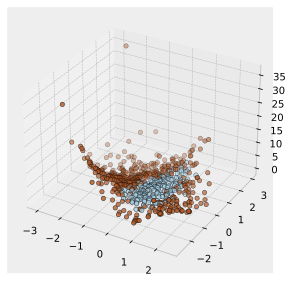

In [24]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xtrain[:,0], Xtrain[:,1], kx1x3, c=Ytrain, cmap='Paired_r', edgecolors='k');